# Supervised Machine Learning Project : Donor Discovery 

In this project, we will evaluate various supervised learning algorithms to effectively model individuals' income using data from the 1994 U.S. Census. Our main goal is to develop a model that can accurately predict whether a person earns more than $50,000 annually. This endeavor is particularly valuable for non-profit organizations, as understanding the income levels of potential donors can guide their donation solicitation strategies. By utilizing publicly available data, we can estimate income brackets, helping non-profits make better decisions about whom to approach and what donation amounts to request.

The dataset for this analysis comes from the UCI Machine Learning Repository, initially contributed by Ron Kohavi and Barry Becker. It was highlighted in Ron Kohavi's article, "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid." For our project, we have made minor adjustments to the original dataset, such as excluding the 'fnlwgt' feature and removing records with missing or poorly formatted entries. We will identify the most effective algorithm through preliminary testing and then refine this algorithm to improve its predictive performance.

### Exploring the Data
Let's start with importing the necessary libaries, reading in the data, and checking out the dataset.

Note that the last column from this dataset, 'income', will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("Dataset.csv")


In [7]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [8]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


A simple investigation of the dataset can determine how many individuals fit into either group and tell us about the percentage of these individuals making more than $50,000.

Let's take a look at the following:

- The total number of records: `n_records`

- The number of individuals making more than $50,000 annually: `n_greater_50k`

- The number of individuals making at most $50,000 annually: `n_at_most_50k`

- The percentage of individuals making more than $50,000 annually: `greater_percent`


In [11]:
# Total number of records
n_records = len(df)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(df[df["income"]== ">50K"])

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(df[df["income"]== "<=50K"])

# Percentage of individuals whose income is more than $50,000
greater_percent = 100 * n_greater_50k / n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))
                       

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


We can also visualize the relationship between different features of an individual, and their incomes.

Let's see breakdown of the counts of people earning above or below 50K based on their sex and education levels.

sns.set(style="whitegrid", color_codes=True)
sns.catplot(x="sex", col='education_level', data=df, hue='income', kind="count", col_wrap=4);

### Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as *preprocessing*. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B960677C8>,
      dtype=object)

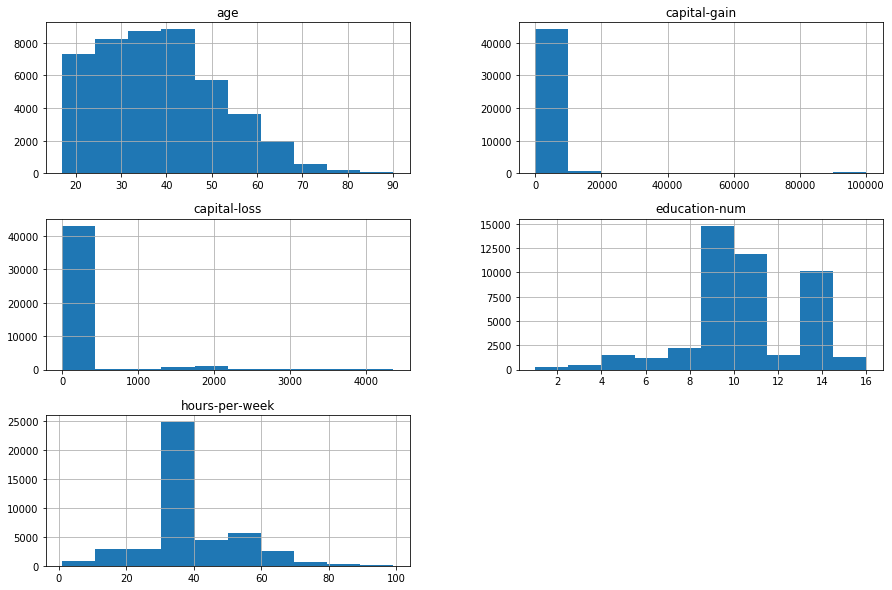

In [12]:
df.hist(figsize = (15,10))

### Transforming Skewed Continuous Features

In [13]:
# Split the data into features and target label
y = df['income']
X = df.drop('income', axis = 1)

# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
X[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B9669CE08>,
      dtype=object)

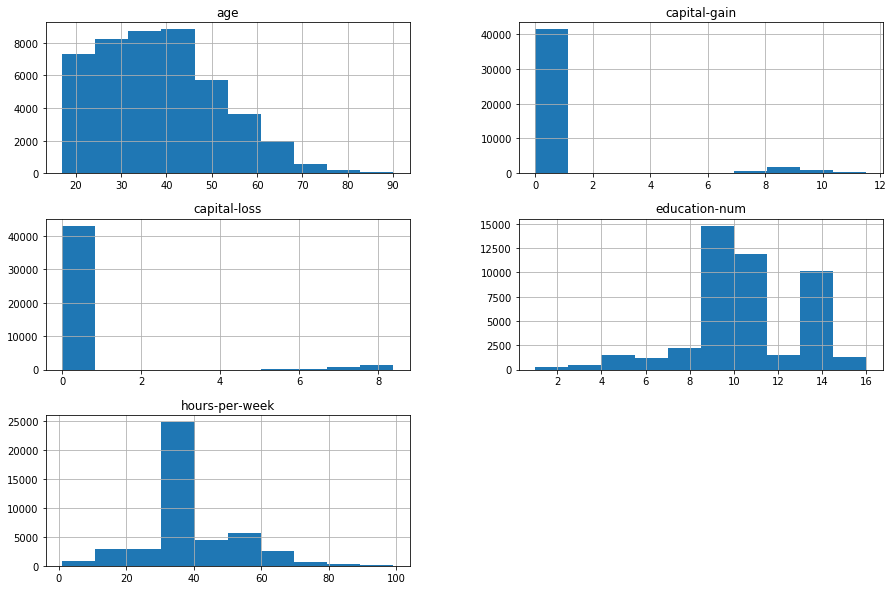

In [14]:
X.hist(figsize = (15,10))

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler, then apply it to the features
scaler = StandardScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X[numerical] = scaler.fit_transform(df[numerical])

# Show an example of a record with scaling applied
display(X.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.034201,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,0.142888,-0.21878,-0.078120,United-States
1,0.866417,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146733,-0.21878,-2.326738,United-States
2,-0.041455,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146733,-0.21878,-0.078120,United-States
3,1.093385,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146733,-0.21878,-0.078120,United-States
4,-0.798015,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146733,-0.21878,-0.078120,Cuba


### Data Preprocessing

The table in the **"Exploring the Data"** section shows that several features in each record are non-numeric. Most machine learning algorithms require numerical input, necessitating the conversion of these non-numeric features (referred to as **categorical variables**). A common method for this conversion is **one-hot encoding**, which creates a "dummy" variable for each possible category of a non-numeric feature.

In addition to converting the non-numeric features, we also need to convert the non-numeric target label **'income'** to numerical values for the learning algorithm to function correctly. Since the **'income'** label has only two categories (**"<=50K"** and **">50K"**), we can encode these categories as **0** and **1**, respectively, instead of using one-hot encoding.


In [16]:
# One-hot encode the features data using pandas.get_dummies()
X = pd.get_dummies(X)

# Encode the income data to numerical values
y = y.apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded = list(X.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names 
# print encoded
# Left uncommented due to output size

103 total features after one-hot encoding.


### Train Test Split

With all categorical variables converted into numerical features and all numerical features normalized, we are ready to split the data into training and test sets. As usual, we will use 80% of the data for training and reserve the remaining 20% for testing.

In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.2 , random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


### Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data.

#### Metrics and the Naive Predictor

*CharityML* aims to accurately predict individuals earning more than **`$50,000`**, as these individuals are more likely to donate to their charity. While **accuracy** might seem like an appropriate metric for evaluating model performance, it is crucial to prioritize **precision** over recall in this scenario. Incorrectly identifying individuals who earn less than **`$50,000`** as potential donors would be detrimental. Thus, *CharityML* focuses on a model's ability to precisely identify those who make over **`$50,000`**.

To balance the considerations of both precision and recall, the **F-beta score** is used as the evaluation metric. The **F-beta score** allows for a weighted evaluation that emphasizes **precision** in predicting




$$
F_{\beta} = (1 + \beta^2) \cdot \frac{{\text{precision} \cdot \text{recall}}}{{\beta^2 \cdot \text{precision} + \text{recall}}}
$$


In particular, when ${\beta} = 0.5$ , more emphasis is placed on precision.

When analyzing the distribution of income classes—specifically, those earning at most **`$50,000`** and those earning more—it becomes evident that the majority of individuals fall into the former category. This imbalance significantly impacts accuracy metrics because a simplistic approach could achieve high accuracy by always predicting "this person does not make more than **`$50,000`**" and generally being correct without examining the data. This approach would be considered naive because it lacks substantiating evidence.

It is essential to acknowledge this naive prediction as a baseline when evaluating model performance. However, relying on such a prediction would be impractical for CharityML, as predicting all individuals earn less than **`$50,000`** would result in identifying no potential donors.



### *Naive Predictor Performace*

What if we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset?

In [19]:
# Calculate accuracy
accuracy = n_greater_50k / n_records

# Calculating precision
precision = n_greater_50k / (n_greater_50k + n_at_most_50k)

#Calculating recall
recall = n_greater_50k / (n_greater_50k + 0)

# Calculate F-score using the formula above for beta = 0.5
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


## Supervise ML Models
### Model Application

Now we'll pick sixsupervised learning models above that are appropriate for this problem, and test them on the census data.

### Decision Trees

**Real World Application:** Decision Trees, such as CART, are utilized in financial analysis for predicting stock performance based on historical data.

**Strengths:**
- Able to handle both categorical and numerical data.
- Minimal data preprocessing required; can handle unnormalized or non-encoded data.
- Simple to understand and interpret.

**Weaknesses:**
- Complex trees can overfit and generalize poorly.
- Prone to instability; small variations in data can lead to different trees.
- Bias towards dominant classes can result in biased trees.

**Candidacy:** Decision Trees are suitable due to their capability to handle mixed data types and simplicity in interpretation, which is beneficial for understanding model decisions in our dataset.

### Support Vector Machines (SVM)

**Real World Application:** SVMs are applied in image classification tasks like face detection.

**Strengths:**
- Effective in high-dimensional spaces with many features.
- Versatile due to customizable kernel functions.

**Weaknesses:**
- Inefficient with large datasets.
- Does not provide direct probability estimates.

**Candidacy:** SVMs are chosen for their effectiveness in high-dimensional spaces, making them suitable for datasets with numerous features like ours, even after incorporating dummy variables.

### Ensemble Methods: AdaBoost

**Real World Application:** AdaBoost is used in object detection in images, such as identifying players during a basketball game.

**Strengths:**
- Robustness and improved generalizability compared to single models.
- Combines simple models to create a complex model efficiently.

**Weaknesses:**
- Sensitive to biased underlying classifiers.

**Candidacy:** AdaBoost is selected for its high-quality classification abilities and robustness to class imbalances, which is beneficial for our dataset.

### Logistic Regression

**Real World Application:** Logistic Regression is commonly used in medical research for predicting disease outcomes based on patient characteristics.

**Strengths:**
- Provides probabilities for outcomes.
- Simple and efficient to implement.

**Weaknesses:**
- Assumes a linear relationship between features and the log-odds of the outcome.

**Candidacy:** Logistic Regression is appropriate due to its simplicity, efficiency, and ability to provide interpretable probability estimates, which are valuable for our classification problem.

### K-Nearest Neighbors (KNN)

**Real World Application:** KNN is applied in recommendation systems for recommending products based on user preferences.

**Strengths:**
- Non-parametric and does not make assumptions about the underlying data distribution.
- Simple to understand and implement.

**Weaknesses:**
- Computationally expensive for large datasets.
- Sensitivity to the choice of distance metric.

**Candidacy:** KNN is suitable for our problem due to its simplicity and effectiveness in handling non-linear relationships between features.

### Random Forest

**Real World Application:** Random Forests are used in ecological modeling for species distribution prediction.

**Strengths:**
- Robust against overfitting compared to single decision trees.
- Handles high-dimensional data well.

**Weaknesses:**
- Can be slow to evaluate due to multiple trees.

**Candidacy:** Random Forests are chosen for their ability to mitigate overfitting and handle high-dimensional data effectively, making them suitable for our dataset.


### Model Evaluation 

Training and evaluating Decision Trees...
Decision Trees Accuracy: 0.8195
Training and evaluating Support Vector Machines (SVM)...
Support Vector Machines (SVM) Accuracy: 0.8559
Training and evaluating Ensemble Methods: AdaBoost...
Ensemble Methods: AdaBoost Accuracy: 0.8607
Training and evaluating Logistic Regression...


C:\Users\Aryan Agarwal\anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Accuracy: 0.8510
Training and evaluating K-Nearest Neighbors (KNN)...
K-Nearest Neighbors (KNN) Accuracy: 0.8357
Training and evaluating Random Forest...
Random Forest Accuracy: 0.8463


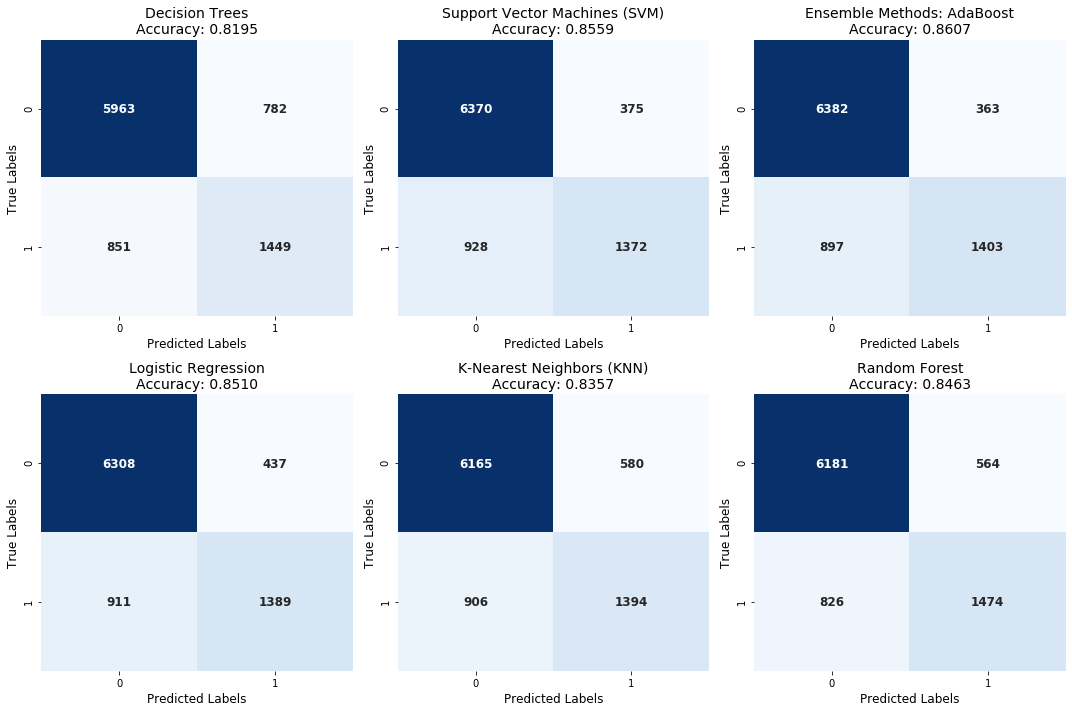

In [22]:
# Importing necessary libraries and models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Define a list of tuples containing model names and their respective classifiers
models = [
    ('Decision Trees', DecisionTreeClassifier()),
    ('Support Vector Machines (SVM)', SVC()),
    ('Ensemble Methods: AdaBoost', AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors (KNN)', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Iterate over the list of models
for i, (model_name, model_instance) in enumerate(models, start=1):
    plt.subplot(2, 3, i)
    
    print(f"Training and evaluating {model_name}...")
    
    # Train the model
    model_instance.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model_instance.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix with Seaborn heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, 
                annot_kws={'fontsize': 12, 'fontweight': 'bold'})
    
    plt.title(f"{model_name}\nAccuracy: {accuracy:.4f}", fontsize=14)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


### AdaBoost Model Tunning

To enhance our model's performance, we will utilize grid search (`GridSearchCV`) with various parameter combinations. Specifically, for AdaBoost, we aim to optimize parameters such as `n_estimators` and `learning_rate`. Additionally, since the base classifier for AdaBoost is a Decision Tree, we will also tune parameters related to the base classifier.


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np


# Define AdaBoost classifier with base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define parameters for GridSearchCV
parameters = {
    'n_estimators': [50, 120],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator__min_samples_split': np.arange(2, 8, 2),
    'base_estimator__max_depth': np.arange(1, 4, 1)
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(adaboost, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print best parameters found and best score on training set
print("Best Parameters:")
print(best_params)
print(f"Best Accuracy Score on Training Set: {best_score:.4f}")

# Evaluate on test set with best estimator found
best_adaboost = grid_search.best_estimator_
y_pred = best_adaboost.predict(X_test)

# Calculate accuracy on test set after tuning
new_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score on Test Set after Hyperparameter Tuning: {new_accuracy:.4f}")


Best Parameters:
{'base_estimator__max_depth': 2, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.5, 'n_estimators': 120}
Best Accuracy Score on Training Set: 0.8683
Accuracy Score on Test Set after Hyperparameter Tuning: 0.8727


### Conclusion

In this project, we developed and evaluated an AdaBoost model to predict individuals' income levels based on data from the 1994 U.S. Census. Our model achieved an accuracy of 87.27% in classifying whether a person earns more than $50,000 annually. This accuracy indicates that our supervised learning approach using AdaBoost is effective in predicting income brackets, which is crucial for non-profit organizations seeking potential donors. By leveraging publicly available census data, we have demonstrated how machine learning can assist in identifying and targeting individuals likely to contribute to charitable causes. Moving forward, further refinements and optimizations to the model could potentially enhance its predictive power and applicability in real-world scenarios.
